In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols, logit
from sklearn.linear_model import LinearRegression
import scipy.stats as sp
from statsmodels.discrete.discrete_model import MNLogit

from skimage.io import imread, imshow
import skimage.filters as filter
import skimage.feature as feature
from skimage.measure import label
from tqdm import tqdm
import os
glow='GLOW Data2.xlsx'; lbws='LBWSdata.xlsx'
main='Reduced MNIST Data'; training='/Reduced Trainging data'; testing='/Reduced Testing data'

In [85]:
img=imread(main+training+'/8/4957.jpg')

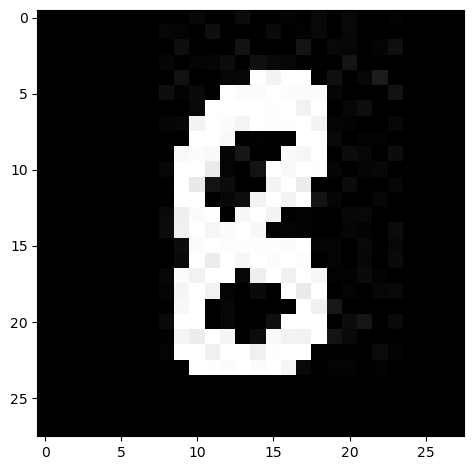

In [87]:
imshow(img)

In [4]:
train_path = main+training+'/8/'
train_files = os.listdir(train_path)
print(train_files[:10])


['4852.jpg', '4853.jpg', '4854.jpg', '4855.jpg', '4856.jpg', '4857.jpg', '4858.jpg', '4859.jpg', '4860.jpg', '4861.jpg']


In [61]:
max_col=max(img.sum(axis=0))
max_row=max(img.sum(axis=1))

In [90]:
width = (img == True).any(axis = 0)
img=img[:,width]
height = (img == True).any(axis = 1)
img=img[height]

In [92]:
img.shape

(21, 12)

In [102]:
img.shape,max(img.sum(axis=0)),max(img.sum(axis=1)),img.sum()

((21, 12), 12, 8, 80)

In [ ]:
def img_data(img):
    img=feature.canny(img)
    
    max_col=max(img.sum(axis=0))
    max_row=max(img.sum(axis=1))
    total_pixel=img.sum()
    width = (img == True).any(axis = 0).sum()
    height = (img == True).any(axis = 1).sum()

    edges=label(img).max()

    
    return {'max_col':max_col,'max_row':max_row,'total_pixels':total_pixel,'width':width,'height':height,'edges':edges}


In [153]:
img_data(imread(main+training+'/2/5008.jpg'))

{'max_col': 7,
 'max_row': 11,
 'total_pixels': 87,
 'width': 20,
 'height': 19,
 'edges': 1}

In [64]:
img=imread(main+training+'/0/4924.jpg')

In [65]:
img=feature.canny(img)

c:\Users\olivi\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


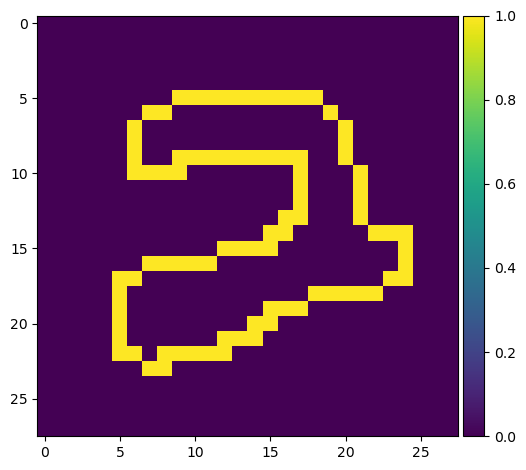

In [228]:
imshow(label(feature.canny(imread(main+training+'/2/5008.jpg'))))

In [224]:
img=imread(main+training+'/2/5005.jpg')

In [225]:
img=feature.canny(img)

In [ ]:
def middle_mean(img,origin):
    row_mean=img[origin-5:origin+5].sum(axis=1).mean()
    col_mean=img[:,origin-5:origin+5].sum(axis=0).mean()
    return row_mean,col_mean

In [222]:
def find_corner2(img):
    X_tl=np.where(img.sum(axis=1)!=0)[0][0]
    Y_tl=np.where(img[X_tl]!=0)[0][0]
    Y_bl=np.where(img.sum(axis=0)!=0)[0][0]
    X_bl=np.where(img[:,Y_bl]!=0)[0][0]
    X_tr=np.where(img.sum(axis=1)!=0)[0][-1]
    Y_tr=np.where(img[X_tr]!=0)[0][-1]
    Y_br=np.where(img.sum(axis=0)!=0)[0][-1]
    X_br=np.where(img[:,Y_br]!=0)[0][-1]
    return [X_tl,Y_tl,X_bl,Y_bl,X_tr,Y_tr,X_br,Y_br]

In [256]:
img[10:18].sum()

33

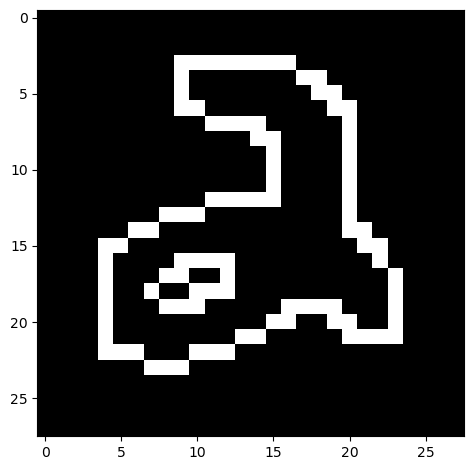

In [259]:
imshow(img)

c:\Users\olivi\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


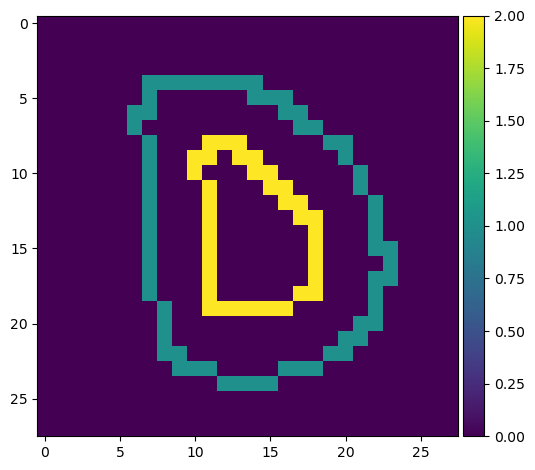

In [67]:
imshow(label(img))

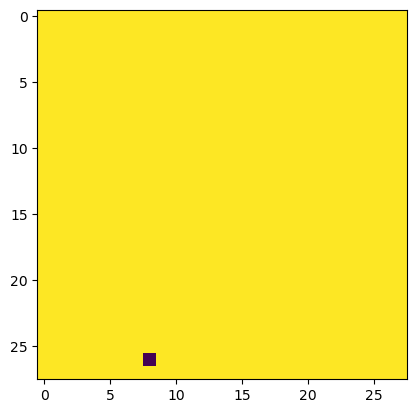

In [181]:
nimg = img.copy().astype(int)
nimg[26, 8] = 0
mimg = img.copy().astype(int)
mimg[26, 8] = 1

plt.imshow(nimg - mimg)
plt.show()

In [180]:
nimg[26], mimg[26]

(array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]))

In [160]:
def showcase(img,inpt):
    for _ in range(1):
        img[inpt[0]][inpt[1]]=False
        imshow(img);plt.show()
        print('',end='\r')
        img[inpt[0]][inpt[1]]=True
        imshow(img);plt.show()
        print('',end='\r')

In [40]:
def make_1D_image_array(train_or_test,from_folder=range(10),safety=False):
    img_1D_array=pd.DataFrame()
    folder_list=[f'/{item}/' for item in from_folder]
    for folder,i in zip(folder_list,range(len(folder_list))):
        path = main+train_or_test+folder
        files = os.listdir(path)
        for file in files:
            img_1D_array=pd.concat([img_1D_array,pd.DataFrame({f'{from_folder[i]}':imread(main+train_or_test+folder+file).reshape(784)})],axis=1)
    img_1D_array=img_1D_array.T
    return img_1D_array.rename(columns={name:name for name in img_1D_array.columns}).reset_index().rename(columns={'index':'true_value'})

In [41]:
imgdata_train=make_1D_image_array(training); imgdata_test=make_1D_image_array(testing)

In [62]:
model=MNLogit.from_formula('true_value ~ p1 + p2',imgdata_train.loc[:,['true_value','p1','p2']]).fit()

ValueError: endog has evaluated to an array with multiple columns that has shape (10000, 10). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [ ]:
preded=model.predict(imgdata_test)

NameError: name 'model' is not defined

In [ ]:
a=(preded.idxmax(axis=1)==imgdata_test.true_value).mean()
print(f'{a:.2%} succes rate')

NameError: name 'preded' is not defined

In [48]:
imgdata_train=imgdata_train.rename(columns={name:f'p{int(name)}' for name in imgdata_train.drop(columns='true_value').columns})

In [68]:
a={'a':1,'b':2}

<function dict.items>